# FIFA 20 overall prediction

Based on the stats of FIFA 19, we'll try to predict the overall of all the players in FIFA 20. Later on, we can use this model to predict the overalls of the players from the future FIAFs.
We'll use libraries such as Pandas and Matplotlib to analyze given data and machine learning models from the Scikit library to construct prediction models to accurately predict the overalls of the players.

## Importing the datasets

Let's start by opening the dataset of the players from FIFA 19 and FIFA 20. We'll use Pandas to open and store the datasets in two different dataframes. We'll select only a handful of columns to reduce the data size as much as possible.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
cols_to_use = ['sofifa_id','short_name', 'age', 'height_cm',
               'weight_kg', 'nationality', 'club', 'overall',
               'potential', 'value_eur', 'weak_foot', 'skill_moves',
               'team_position', 
               'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'] 
fifa19 = pd.read_csv('fifa-19.csv', usecols=cols_to_use)
fifa20 = pd.read_csv('fifa-20.csv', usecols=cols_to_use)

fifa19.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,4,5,LW,90.0,93.0,81.0,89.0,35.0,79.0
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,4,4,RW,88.0,91.0,88.0,96.0,32.0,61.0
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,5,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0
3,193080,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,5,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,3,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0
6,176580,L. Suárez,31,182,86,Uruguay,FC Barcelona,91,91,80000000,4,3,ST,80.0,90.0,79.0,88.0,52.0,85.0
7,177003,L. Modrić,32,172,66,Croatia,Real Madrid,91,91,67000000,4,4,RCM,76.0,76.0,90.0,91.0,70.0,67.0
8,183277,E. Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,4,4,LW,91.0,82.0,86.0,94.0,35.0,67.0
9,200389,J. Oblak,25,188,87,Slovenia,Atlético Madrid,90,93,68000000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fifa20.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,4,4,RW,87.0,92.0,92.0,96.0,39.0,66.0
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,4,5,LW,90.0,93.0,82.0,89.0,35.0,78.0
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,5,5,CAM,91.0,85.0,87.0,95.0,32.0,58.0
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,4,4,LW,91.0,83.0,86.0,94.0,35.0,66.0
5,192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,5,4,RCM,76.0,86.0,92.0,86.0,61.0,78.0
6,192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,4,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,3,2,LCB,77.0,60.0,70.0,71.0,90.0,86.0
8,177003,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,4,4,RCM,74.0,76.0,89.0,89.0,72.0,66.0
9,209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,3,4,RW,93.0,86.0,81.0,89.0,45.0,74.0


ANALYZING THE DATA....

In [7]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 19 columns):
sofifa_id        17770 non-null int64
short_name       17770 non-null object
age              17770 non-null int64
height_cm        17770 non-null int64
weight_kg        17770 non-null int64
nationality      17770 non-null object
club             17770 non-null object
overall          17770 non-null int64
potential        17770 non-null int64
value_eur        17770 non-null int64
weak_foot        17770 non-null int64
skill_moves      17770 non-null int64
team_position    17547 non-null object
pace             15784 non-null float64
shooting         15784 non-null float64
passing          15784 non-null float64
dribbling        15784 non-null float64
defending        15784 non-null float64
physic           15784 non-null float64
dtypes: float64(6), int64(9), object(4)
memory usage: 2.6+ MB


In [8]:
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 19 columns):
sofifa_id        18278 non-null int64
short_name       18278 non-null object
age              18278 non-null int64
height_cm        18278 non-null int64
weight_kg        18278 non-null int64
nationality      18278 non-null object
club             18278 non-null object
overall          18278 non-null int64
potential        18278 non-null int64
value_eur        18278 non-null int64
weak_foot        18278 non-null int64
skill_moves      18278 non-null int64
team_position    18038 non-null object
pace             16242 non-null float64
shooting         16242 non-null float64
passing          16242 non-null float64
dribbling        16242 non-null float64
defending        16242 non-null float64
physic           16242 non-null float64
dtypes: float64(6), int64(9), object(4)
memory usage: 2.6+ MB


Here we can see that not all columns have equal no. of data in both the fifa19 and fifa20 files. 

In [9]:
print(fifa19.shape)
print(fifa20.shape)

(17770, 19)
(18278, 19)


The FIFA 19 dataframe has 17770 rows, whereas, the FIFA 20 one has 18278 rows, indicating a larger player database.

Now, let's add the FIFA 20 overall column to our FIFA 19 dataframe to help us train our model.

In [10]:
def get20overall (row):
    try:
        return fifa20[fifa20['sofifa_id'] == row.sofifa_id].overall.values[0]
    except:
        return np.NaN

fifa19['20_overall'] = fifa19.apply (lambda row: get20overall(row), axis=1)
fifa19 = fifa19.dropna()
fifa19.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,20_overall
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,4,5,LW,90.0,93.0,81.0,89.0,35.0,79.0,93.0
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,4,4,RW,88.0,91.0,88.0,96.0,32.0,61.0,94.0
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,5,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0,92.0
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,5,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0,91.0
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,3,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0,89.0


Now let's remove the GK position since they have different attributes

In [11]:
fifa19 = fifa19[fifa19.team_position != "GK"]
fifa19.drop_duplicates(inplace=True)

In [12]:
fifa19.info()

#equal number of data for all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 17769
Data columns (total 20 columns):
sofifa_id        11592 non-null int64
short_name       11592 non-null object
age              11592 non-null int64
height_cm        11592 non-null int64
weight_kg        11592 non-null int64
nationality      11592 non-null object
club             11592 non-null object
overall          11592 non-null int64
potential        11592 non-null int64
value_eur        11592 non-null int64
weak_foot        11592 non-null int64
skill_moves      11592 non-null int64
team_position    11592 non-null object
pace             11592 non-null float64
shooting         11592 non-null float64
passing          11592 non-null float64
dribbling        11592 non-null float64
defending        11592 non-null float64
physic           11592 non-null float64
20_overall       11592 non-null float64
dtypes: float64(7), int64(9), object(4)
memory usage: 1.9+ MB


Let's first visualize how many types of team_position there are

In [17]:
fifa19.team_position.value_counts()

SUB    4754
RES    1504
RCB     539
LCB     533
RB      473
LB      464
ST      369
RM      357
LM      349
LCM     324
RCM     323
CAM     258
LDM     212
RDM     199
RS      164
LS      162
CDM     123
LW      120
RW      119
CB       67
CM       49
LWB      34
RWB      30
RAM      19
LAM      18
RF       10
CF       10
LF        9
Name: team_position, dtype: int64

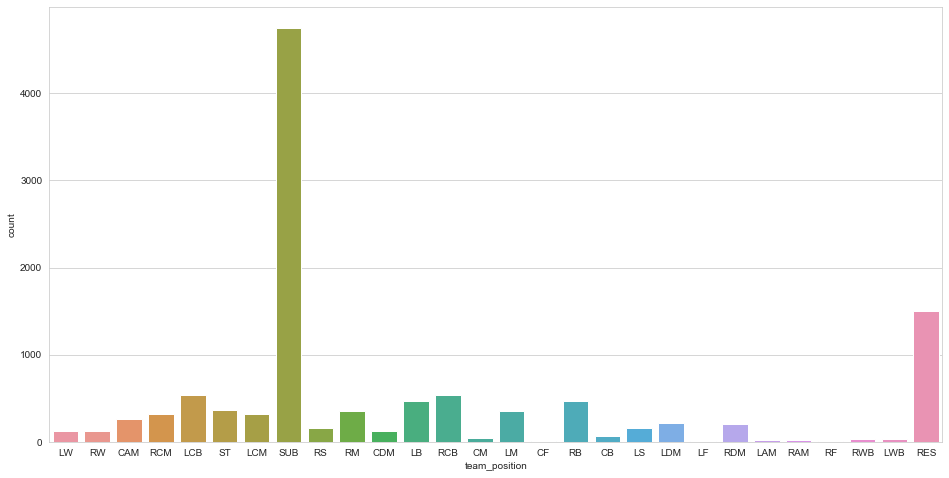

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='team_position',data=fifa19)

Since there are too many positions, we are going to categorize them into 5 groups

Forward, Midfielder, Defender, Subsitute, Reserve


In [33]:

def position (row):
    if(row.team_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or 
       row.team_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or 
       row.team_position == "LCB"):
        return 'Defender'
    if(row.team_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or 
       row.team_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.team_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if(row.team_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.team_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.team_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.team_position == "RCM"or row.team_position == "LCM"):
        return 'Midfielder'
    if (row.team_position == "SUB"):
        return 'Substitute'
    if (row.team_position == "RES"):
        return 'Reserve'
    return "other"

fifa19['field_position'] = fifa19.apply (lambda row: position(row), axis=1)


In [34]:
fifa19.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,20_overall,field_position
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,...,5,LW,90.0,93.0,81.0,89.0,35.0,79.0,93.0,Forward
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,...,4,RW,88.0,91.0,88.0,96.0,32.0,61.0,94.0,Forward
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,...,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0,92.0,Midfielder
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,...,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0,91.0,Midfielder
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,...,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0,89.0,Defender
6,176580,L. Suárez,31,182,86,Uruguay,FC Barcelona,91,91,80000000,...,3,ST,80.0,90.0,79.0,88.0,52.0,85.0,89.0,Forward
7,177003,L. Modrić,32,172,66,Croatia,Real Madrid,91,91,67000000,...,4,RCM,76.0,76.0,90.0,91.0,70.0,67.0,90.0,Midfielder
8,183277,E. Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,...,4,LW,91.0,82.0,86.0,94.0,35.0,67.0,91.0,Forward
12,182493,D. Godín,32,187,78,Uruguay,Atlético Madrid,90,90,44000000,...,2,LCB,68.0,48.0,65.0,62.0,89.0,84.0,88.0,Defender
13,182521,T. Kroos,28,183,76,Germany,Real Madrid,90,90,76500000,...,3,LCM,67.0,82.0,89.0,82.0,74.0,69.0,88.0,Midfielder
